In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [11]:
# Generating data
def generate_data (size=10, mean=5, sd=2, seed=None):
    if seed is not None:
        np.random.seed(seed)
    x = np.random.normal(loc=mean, scale=sd, size=size)
    x =np.round(x)
    x = np.clip(x,0,None)
    y_mean = 3*x+5
    y = np.random.poisson(lam=y_mean)
    df = pd.DataFrame({'x':x, 'y':y})
    return df

df = generate_data(seed=1)
print(df)

     x   y
0  8.0  28
1  4.0  12
2  4.0  15
3  3.0   8
4  7.0  18
5  0.0   6
6  8.0  33
7  3.0  17
8  6.0  22
9  5.0  17


In [4]:
# Fitting a random line
# y = ax + b
a = 8
b = -1

df['initial_prediction'] = df['x']*a + b
print(df)

        x   y  initial_prediction
0     9.0  28                71.0
1     6.0  21                47.0
2     5.0  18                39.0
3     1.0   9                 7.0
4     4.0  15                31.0
...   ...  ..                 ...
9995  3.0  17                23.0
9996  3.0  12                23.0
9997  6.0  21                47.0
9998  4.0  20                31.0
9999  6.0  30                47.0

[10000 rows x 3 columns]


In [5]:
#calculating error
mean_squared_error(df['initial_prediction'], df['y'])

473.5422

<Axes: xlabel='x', ylabel='y'>

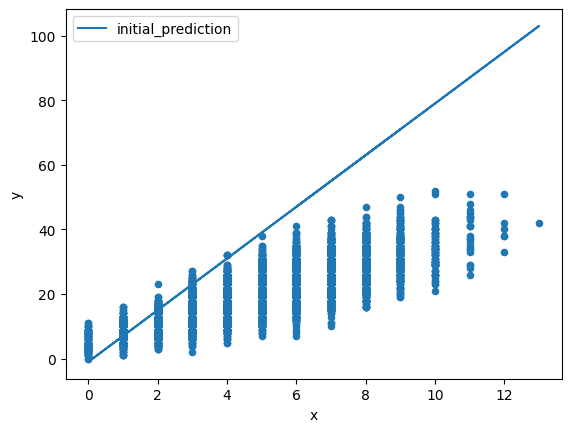

In [6]:
#fitting the line
ax = df.plot.scatter(x='x',y='y')
df.plot.line(x='x',y='initial_prediction', ax=ax)

<Axes: xlabel='a'>

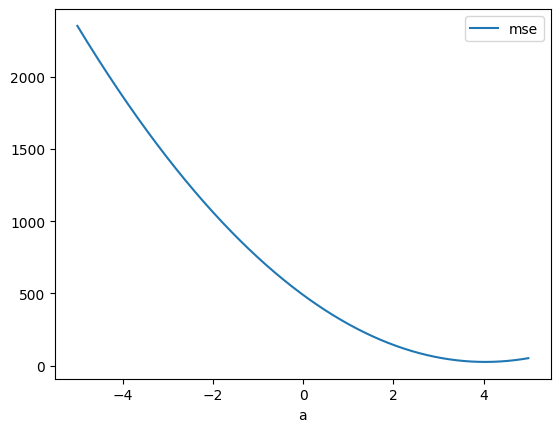

In [7]:
#checking the value of a and its impact on the error
result=[]
for weight in np.arange(-5,5,0.01):
    pred = df['x']*weight + b
    result.append({
        'a': weight,
        'mse': mean_squared_error(df['y'], pred)
    })

ax = pd.DataFrame(result).plot.line(x='a', y='mse')
ax

In [8]:
#calculting the derivatives
def derivative_a(df,x,y,a,b):
    return -2 / df.shape[0] * (df[x] * (df[y] - (df[x] * a + b))).sum()
def derivative_b(df,x,y,a,b):
    return -2 / df.shape[0] * ((df[y] - (df[x] * a + b))).sum()
def update(old_value, derivative, learningRate=0.005):
    return old_value - (learningRate*derivative)

In [9]:
derivative_slope = derivative_a(df,'x','y',a,b)
new_slope = update(a,derivative_slope)
derivative_interception = derivative_b(df,'x','y',a,b)
new_interception = update(b,derivative_interception)

df['prediction_new']= df['x']*new_slope+new_interception
previous_mse=mean_squared_error(df['y'],df['initial_prediction'])
new_mse=mean_squared_error(df['y'],df['prediction_new'])
print(a, new_slope, b, new_interception, previous_mse, new_mse)

8 6.870755 -1 -1.1873420000000001 473.5422 249.9334388936504


In [10]:
newA = a
newB = b

for _ in range(2000):
    a = newA
    b = newB

    derivativeS = derivative_a(df, 'x', 'y', newA, newB)
    newA = update(newA, derivativeS)

    derivativeI = derivative_b(df, 'x', 'y', newA, newB)
    newB = update(newB, derivativeI)

    print ('Iteration {} Slope:{} and intercept:{} MSE:{}'.format(_, newA, newB, mean_squared_error((df['x']*newA)+newB, df['y'])))

    if np.abs(newA - a) < 0.001 and np.abs(newB - b) < 0.001:
        break

    # Or use the change in MSE for convergance


Iteration 0 Slope:6.870755 and intercept:-1.131490671545 MSE:251.38441740243536
Iteration 1 Slope:6.069659638208944 and intercept:-1.222045060875726 MSE:139.68110768218733
Iteration 2 Slope:5.501221401144829 and intercept:-1.283579519546191 MSE:83.50677207847754
Iteration 3 Slope:5.097736565249779 and intercept:-1.324542677131418 MSE:55.24993304794349
Iteration 4 Slope:4.811203522428231 and intercept:-1.3509245653758817 MSE:41.02970399291827
Iteration 5 Slope:4.607589367603357 and intercept:-1.3669720822544174 MSE:33.86759342170558
Iteration 6 Slope:4.462764937477011 and intercept:-1.3756962524745486 MSE:30.255036217132105
Iteration 7 Slope:4.35962277299176 and intercept:-1.3792318726792026 MSE:28.42790144074277
Iteration 8 Slope:4.286033768883039 and intercept:-1.3790924981275967 MSE:27.499076067251572
Iteration 9 Slope:4.233398448255669 and intercept:-1.3763512269985978 MSE:27.02239759972377
Iteration 10 Slope:4.1956198233797855 and intercept:-1.3717688755731525 MSE:26.77342617277856